In [1]:
import numpy as np
import matplotlib.pyplot as plt
import schedule
import fun
import time
import Simulated_annealing
import Gradient_descent
import schedule
import SAST_GD
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)
pi = np.pi

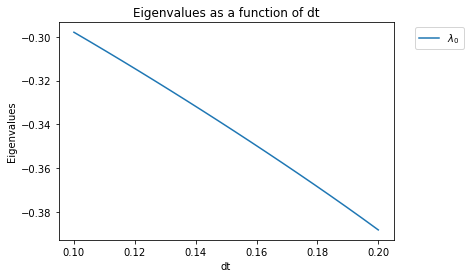

In [2]:
#creating Hamiltonian
m = 5 #H_mxm
H_num_coeff = m + int(m*(m+1)/2)
H_coeff = np.random.randn(H_num_coeff)
HA,HB = fun.sym_matrix(m,H_coeff)
dt = np.linspace(0.1,0.2,20)
#E_true,vt = fun.En_loop(dt,HA,HB,1)
E_true,v0 = fun.Emin_loop(dt,HA,HB)
#ploting m eigvenvalue as a function of dt
plt.plot(dt,E_true,label =f'$\lambda_{0}$')
plt.legend()
plt.xlabel('dt')
plt.ylabel('Eigenvalues')
plt.title('Eigenvalues as a function of dt')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

In [3]:
epoch = 10
n               = 5 #size of M = A+Bdt
n_coeff         = n + int(n*(n+1)/2) #number of matrix elements
iters           = 10000
eta            = 1e-3
beta = 1
GD_coeff,GD_cost = Gradient_descent.random_initial(E_true, dt, n, n_coeff, eta,iters, epoch)
print('SSE:',GD_cost)

SSE: 1.6157647902516804e-06


In [9]:
n               = 5 #size of M = A+Bdt
n_coeff         = n + int(n*(n+1)/2) #number of matrix elements
iters           = 1000
eta            = 1e-3
tol = 1e-20
GD0_coeff = GD_coeff
GD0_cost = GD_cost
for i in range(100):
    optimizer  =    schedule.Adam(eta,rho=0.9, rho2=0.999)
    GD1_coeff, GD1_cost = Gradient_descent.gradient_descent2(E_true, dt, n, GD_coeff,optimizer,eta,iters)
    print('Iteration', i, 'SSE:', GD1_cost)
    if abs(GD1_cost - GD0_cost) < tol:
        break
    GD0_coeff = GD1_coeff
    GD0_cost = GD1_cost

Iteration 0 SSE: 1.6157647902516804e-06


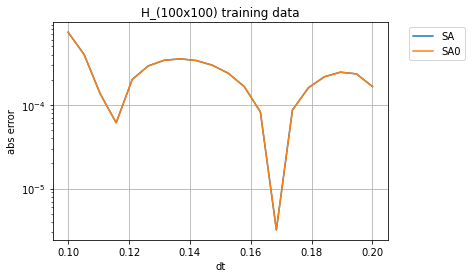

In [10]:
GD_E_pred,va = fun.fun(dt, n, GD_coeff)
GD0_E_pred,va = fun.fun(dt, n, GD0_coeff)
plt.plot(dt,abs(GD_E_pred-E_true),label='SA')
plt.plot(dt,abs(GD0_E_pred-E_true),label='SA0')
plt.xlabel('dt')
plt.ylabel('abs error')
plt.title('H_(100x100) training data')
plt.yscale('log')
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

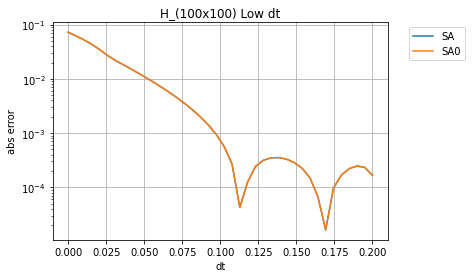

In [11]:
dt0 = np.linspace(1e-9,0.2,40)
E0_true,vt0 = fun.Emin_loop(dt0,HA,HB)
GD_E0_pred,va0 = fun.fun(dt0, n, GD_coeff)
GD0_E0_pred,va0 = fun.fun(dt0, n, GD0_coeff)
plt.plot(dt0,abs(GD_E0_pred-E0_true),label='SA')
plt.plot(dt0,abs(GD0_E0_pred-E0_true),label='SA0')
plt.xlabel('dt')
plt.ylabel('abs error')
plt.title('H_(100x100) Low dt')
plt.yscale('log')
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()